In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score

import numpy as np
from sklearn import svm
import math
%matplotlib inline

In [0]:
df = pd.read_csv('train_2v.csv')
df2 = pd.read_csv('train_2v.csv',index_col ='id')


In [29]:
df['stroke'].value_counts() #notice data imbalance

0    42617
1      783
Name: stroke, dtype: int64

In [30]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [31]:
df.info() #notice missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [32]:
df.isnull().sum()/len(df)*100 #percentage of missing data for each feature

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

In [0]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean()) #fill with average value

In [0]:
label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])
df['ever_married'] = label.fit_transform(df['ever_married'])
df['work_type']= label.fit_transform(df['work_type'])
df['Residence_type']= label.fit_transform(df['Residence_type'])


In [0]:
df_without_smoke = df[df['smoking_status'].isnull()]
df_with_smoke = df[df['smoking_status'].notnull()]

In [36]:
df_without_smoke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,NaN,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,NaN,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,NaN,0
5,32257,0,47.0,0,0,1,2,1,210.95,50.1,NaN,0
10,10460,0,79.0,0,0,1,0,1,77.08,35.0,NaN,0


In [37]:
df_without_smoke.drop(columns='smoking_status',axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
df_with_smoke['smoking_status']= label.fit_transform(df_with_smoke['smoking_status'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_with_smoke.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.005445,0.000131,0.002157,0.013075,0.000043,0.008955,-0.000966,0.020976,0.013226,0.004082,0.002238
gender,0.005445,1.000000,0.040785,0.037431,0.097549,0.024852,0.010247,0.004814,0.053496,0.019278,-0.013613,0.013689
age,0.000131,0.040785,1.000000,0.259528,0.251819,0.546996,0.018850,0.004044,0.230682,0.101619,-0.147968,0.159838
hypertension,0.002157,0.037431,0.259528,1.000000,0.114957,0.133258,0.019309,-0.004427,0.154702,0.120730,-0.030094,0.073310
heart_disease,0.013075,0.097549,0.251819,0.114957,1.000000,0.098229,0.034466,-0.000583,0.139449,0.018562,-0.035660,0.107007
ever_married,0.000043,0.024852,0.546996,0.133258,0.098229,1.000000,-0.067305,0.004990,0.120161,0.139949,-0.053049,0.051666
work_type,0.008955,0.010247,0.018850,0.019309,0.034466,-0.067305,1.000000,-0.010796,0.008315,-0.066278,-0.030810,0.025708
Residence_type,-0.000966,0.004814,0.004044,-0.004427,-0.000583,0.004990,-0.010796,1.000000,-0.001361,-0.002944,0.010095,0.002064
avg_glucose_level,0.020976,0.053496,0.230682,0.154702,0.139449,0.120161,0.008315,-0.001361,1.000000,0.167699,-0.035164,0.077206
bmi,0.013226,0.019278,0.101619,0.120730,0.018562,0.139949,-0.066278,-0.002944,0.167699,1.000000,-0.035568,-0.006950


In [40]:
df_with_smoke['smoking_status'].value_counts()

1    16053
0     7493
2     6562
Name: smoking_status, dtype: int64

In [41]:
df_without_smoke.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,1.000000,-0.003247,0.015754,0.012454,-0.007069,0.012143,-0.024743,0.002390,0.029310,0.014363,0.002541
gender,-0.003247,1.000000,-0.086428,0.010478,0.053051,-0.088228,0.108464,-0.005223,0.006236,-0.056618,0.012512
age,0.015754,-0.086428,1.000000,0.263449,0.267157,0.809762,-0.634802,-0.006817,0.216325,0.549640,0.161270
hypertension,0.012454,0.010478,0.263449,1.000000,0.108980,0.206974,-0.130845,-0.000658,0.133043,0.161240,0.063443
heart_disease,-0.007069,0.053051,0.267157,0.108980,1.000000,0.174170,-0.084865,-0.010365,0.154104,0.100979,0.133231
ever_married,0.012143,-0.088228,0.809762,0.206974,0.174170,1.000000,-0.588867,0.000608,0.164053,0.506752,0.102138
work_type,-0.024743,0.108464,-0.634802,-0.130845,-0.084865,-0.588867,1.000000,0.011505,-0.111616,-0.520519,-0.053822
Residence_type,0.002390,-0.005223,-0.006817,-0.000658,-0.010365,0.000608,0.011505,1.000000,0.002837,-0.008531,0.002426
avg_glucose_level,0.029310,0.006236,0.216325,0.133043,0.154104,0.164053,-0.111616,0.002837,1.000000,0.167669,0.070830
bmi,0.014363,-0.056618,0.549640,0.161240,0.100979,0.506752,-0.520519,-0.008531,0.167669,1.000000,0.054187


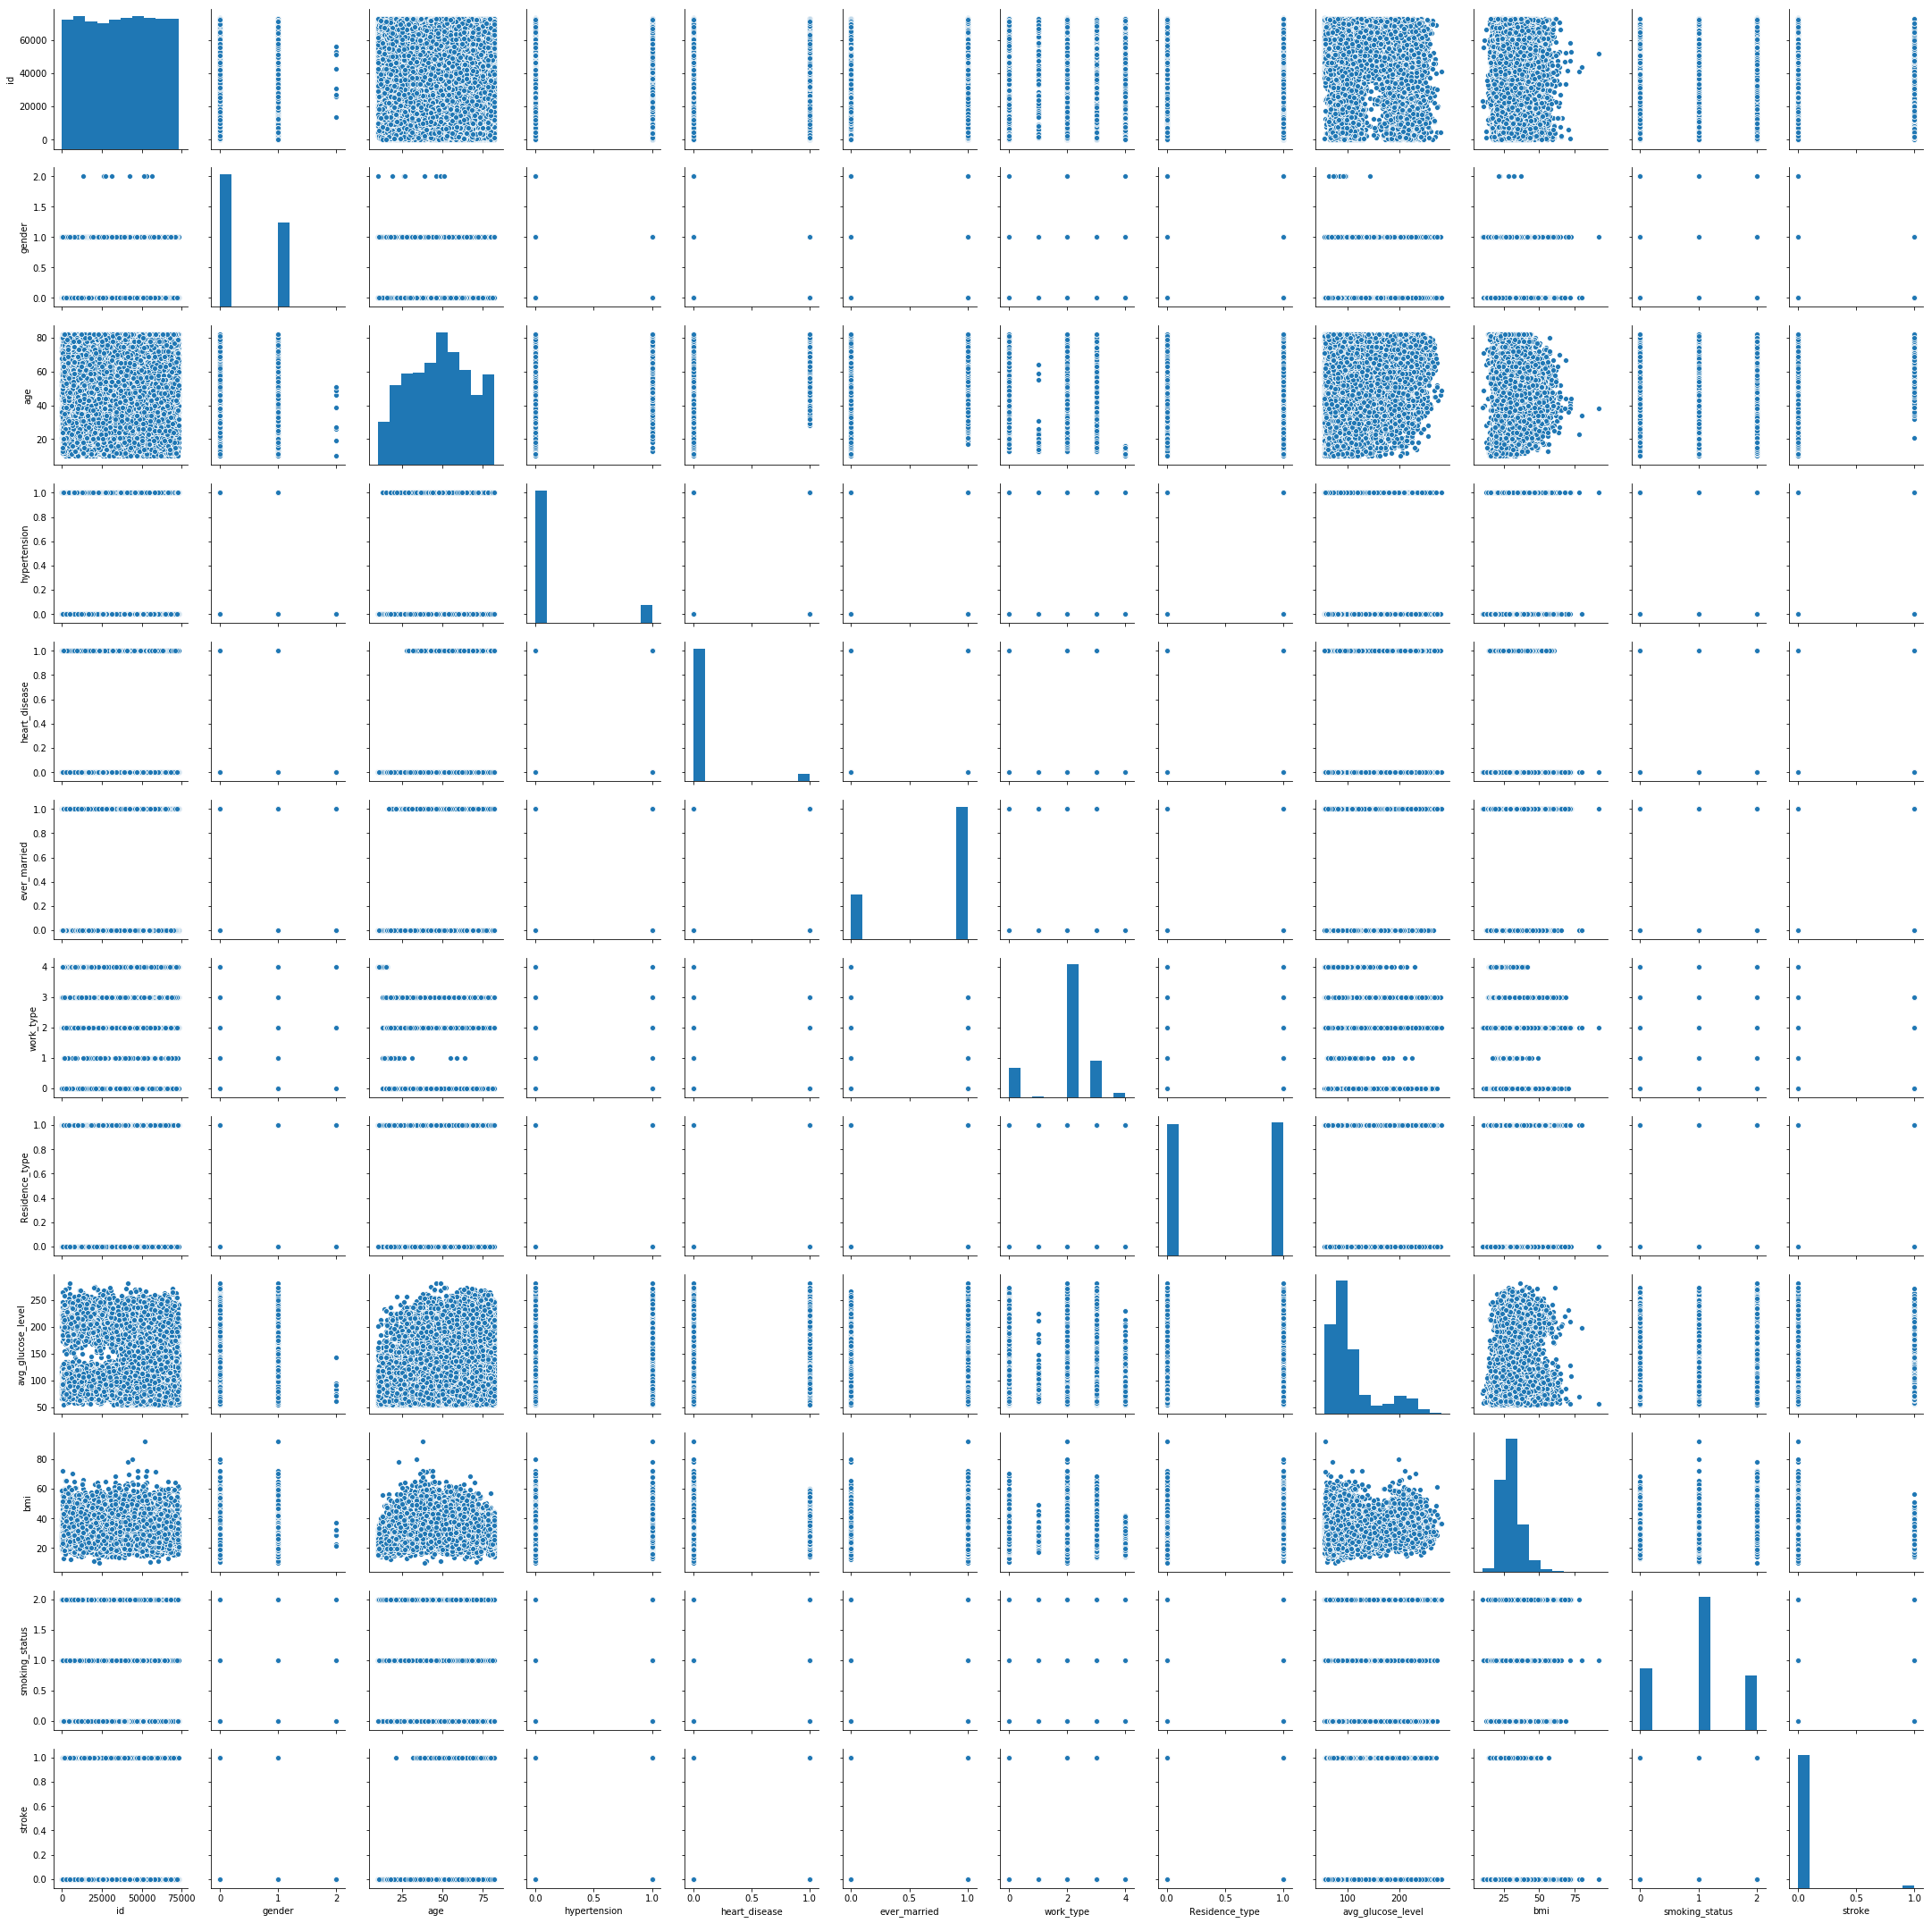

In [16]:
sns.pairplot(df_with_smoke)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


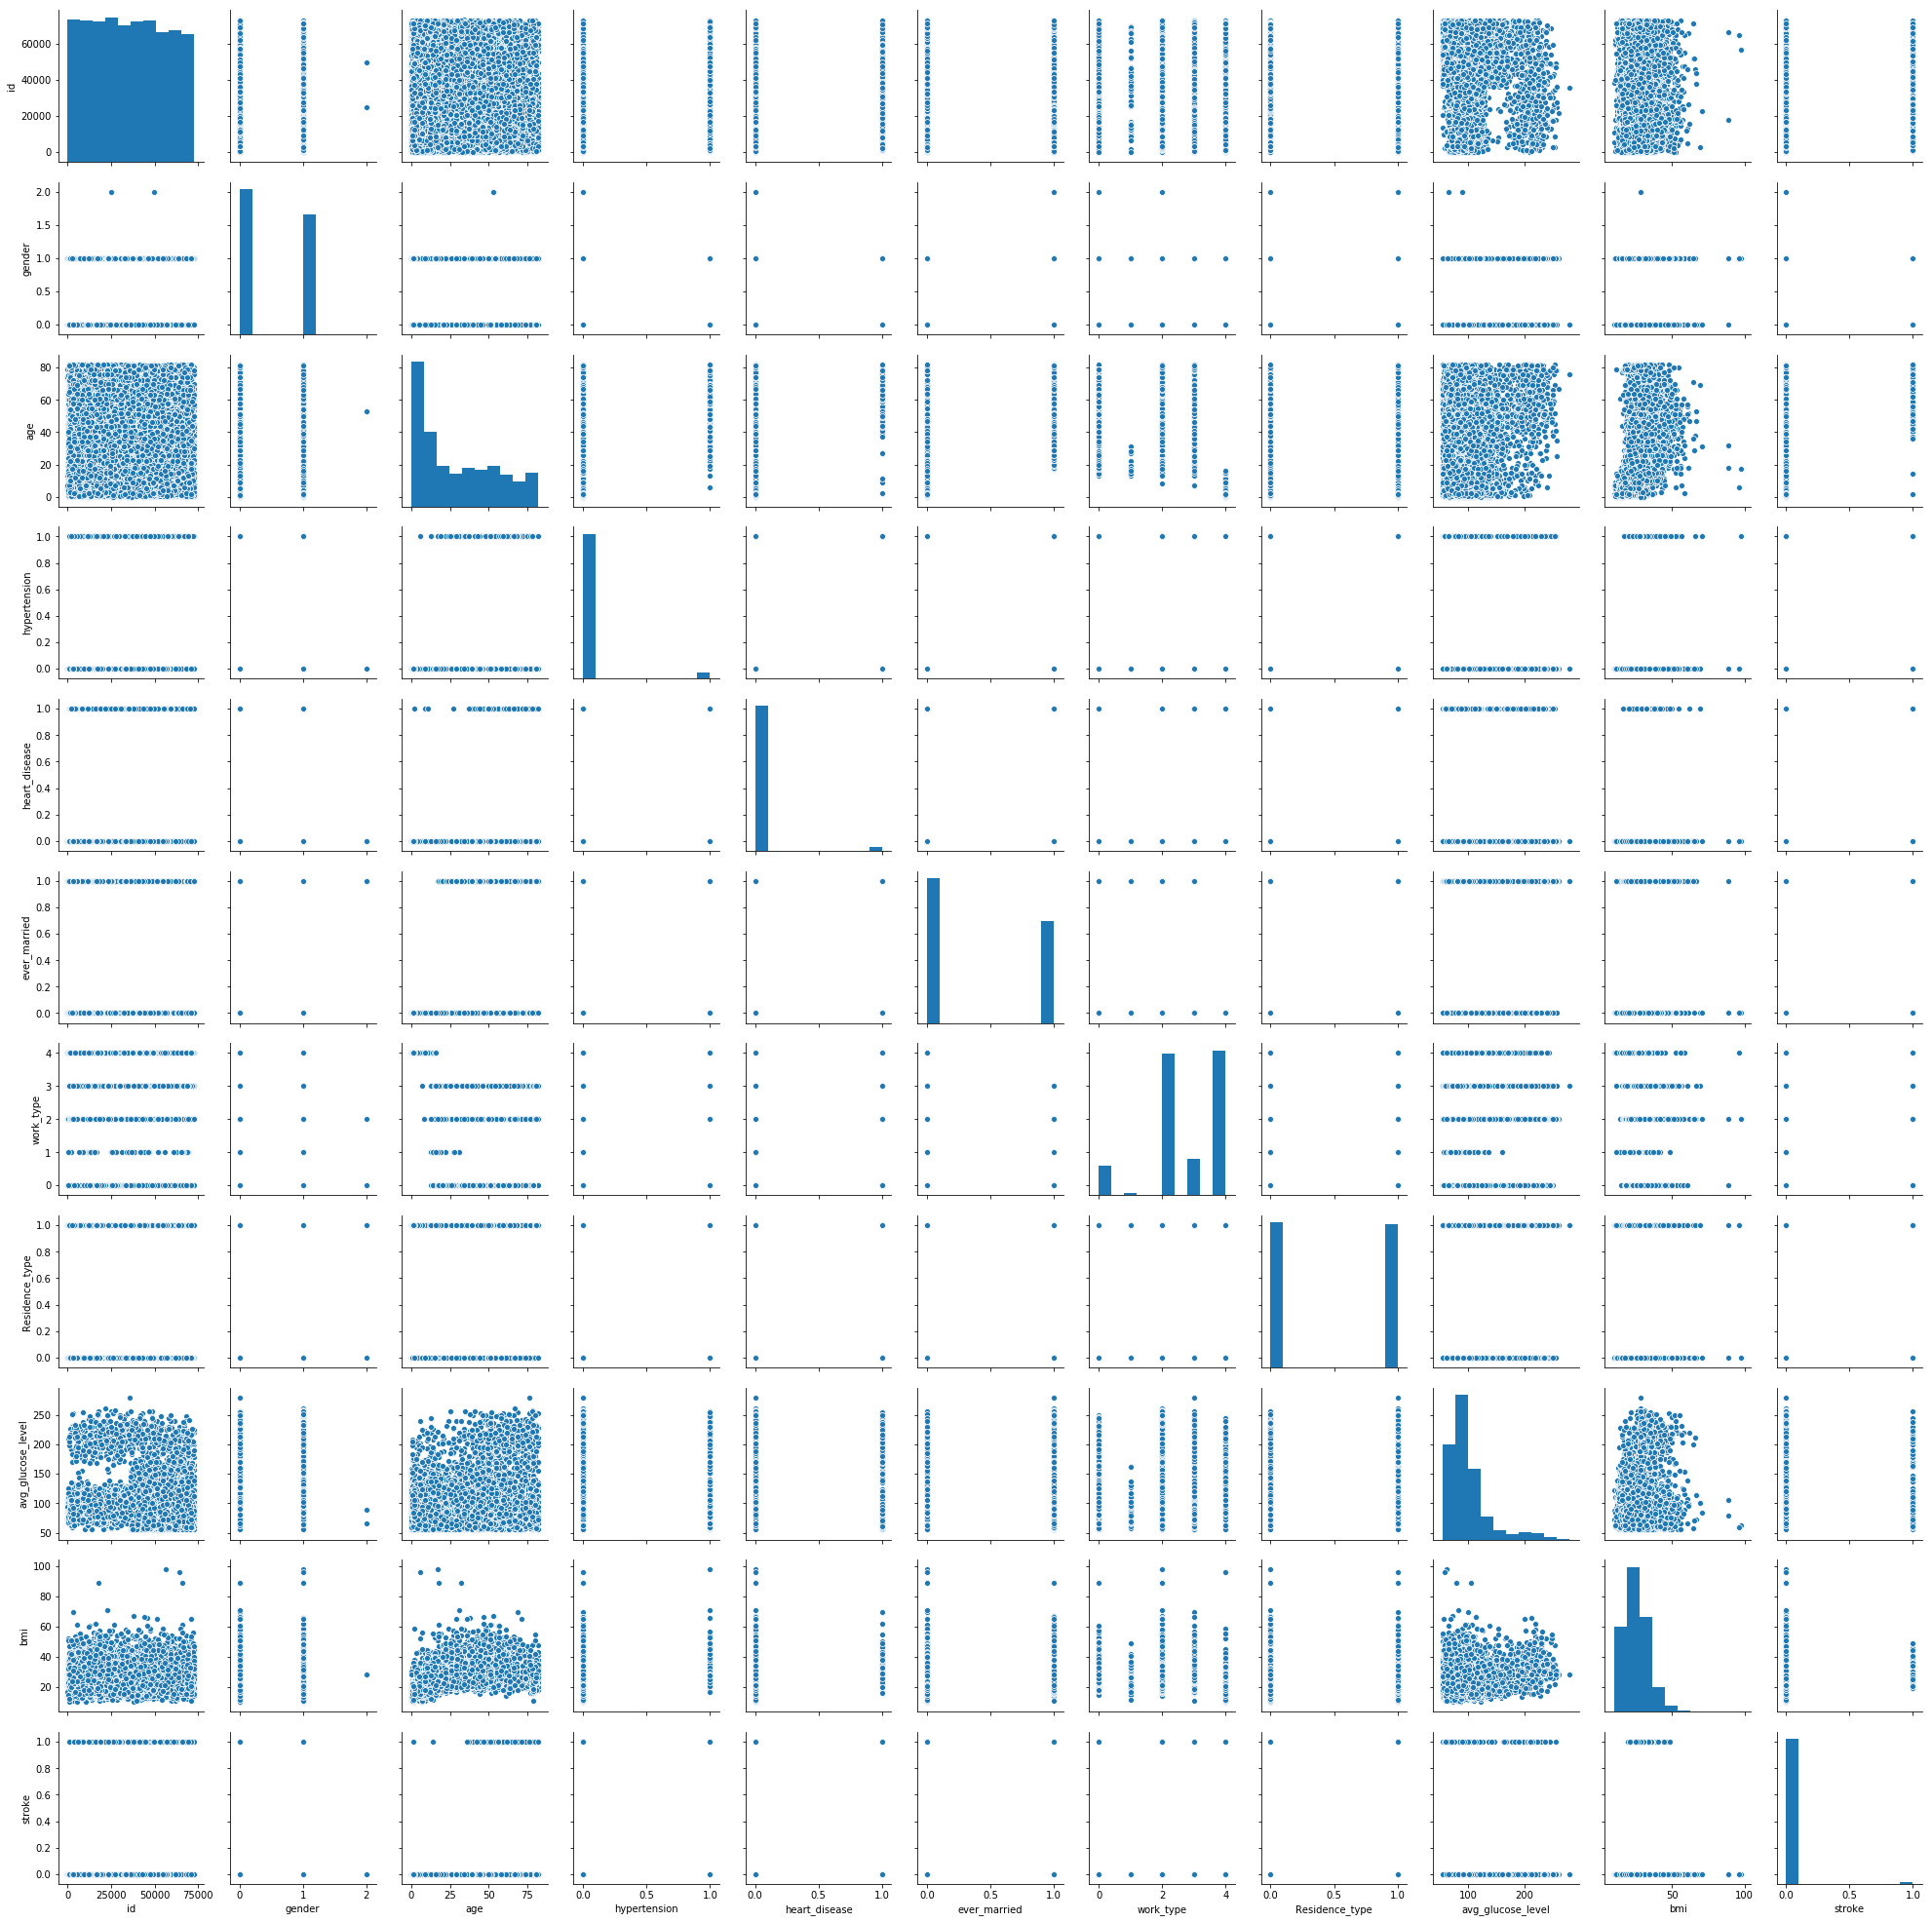

In [17]:
sns.pairplot(df_without_smoke)

In [0]:
ros = RandomOverSampler(random_state=0) #compesate for imbalance in the data
smote = SMOTE() 

In [0]:
X_sample, y_sample = ros.fit_resample(df_with_smoke.loc[:,df_with_smoke.columns!='stroke'], 
                                            df_with_smoke['stroke'])

In [44]:
print ('ROS Output Data Shape for Smoke Data: {}'.format(y_sample.shape))

ROS Output Data Shape for Smoke Data: (58940,)


In [0]:
X_sample_1, y_sample_1 = ros.fit_resample(df_without_smoke.loc[:,df_without_smoke.columns!='stroke'], 
                                            df_without_smoke['stroke'])

In [46]:
print ('ROS Input Data Shape for Non Smoke Data: {}'.format(X_sample_1.shape))
print ('ROS Output Data Shape for Non Smoke Data: {}'.format(y_sample_1.shape))

ROS Input Data Shape for Non Smoke Data: (26294, 10)
ROS Output Data Shape for Non Smoke Data: (26294,)


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(47152, 11)
(11788, 11)


In [48]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_sample_1,y_sample_1,test_size=0.2)
print(X_train_1.shape)
print(X_test_1.shape)

(21035, 10)
(5259, 10)


In [0]:
newdata = np.column_stack((X_train,y_train))
newdataTest = np.column_stack((X_test,y_test)) 


In [0]:
newdata1 = np.column_stack((X_train_1,y_train_1)) #in case it is of interest to analyze data without smoking as a feature
newdataTest1 = np.column_stack((X_test_1,y_test_1)) #  bayes log odds might be useful

In [0]:
  '''Class that involvles Random forest model and Logistic Model. Saves results over 5 cross valiadtion procedure over the number of trees and L1 norm constant respectively. In addition it evaluates the test accuracy'''
class Methods(object): 
    def __init__(self, dataset,datasetTest,cross_validationNumber=5,Repeats=3,Cs=[10,1,0.1,0.01,0.001,0.00000000001],NumClasses=2,model='Logistic_model'):
        self.newdata = dataset
        self.newdataTest = datasetTest
        self.test_set = round(len(self.newdata)/5)
        self.train_set=len(self.newdata)- self.test_set
        self.cross_validationNumber=cross_validationNumber
        self.Repeats=Repeats
        self.Cs = Cs
        self.parameter_case=len(self.Cs)
        self.NumClasses=NumClasses
        self.accuracy = np.zeros((self.parameter_case,cross_validationNumber,Repeats))
        self.test_error = np.zeros((Repeats))
        self.bestParameters = np.zeros((Repeats))
        self.mean1=np.zeros((self.parameter_case,Repeats))
        self.test_accuracy = np.zeros((Repeats,Repeats)) #best case index is row
        
        
        self.label = model
        if model=='Logistic_model':
          self.coef_ = {}
          self.variance_exp = np.zeros((self.parameter_case,cross_validationNumber,Repeats))
          
        elif model=='Random_forest_model':
          self.features = {}

          
    def Logistic_model(self,case):
      log = LogisticRegression(penalty='l1', C=case,solver='liblinear')
      return log


    def Training(self):
      for i in range(self.Repeats):
        dataRandomised = np.random.permutation(self.newdata) #randomize the data for each repeat
        cross_validation = dataRandomised
        X_cross_validation = cross_validation[:,:-1] 
        y_cross_validation = cross_validation[:,-1]
        y_cross_validation = y_cross_validation.astype(int)
        m=len(cross_validation)
        fold_prev=-1
        for fold in range(1,self.cross_validationNumber+1): #consider a fold a in the k cross validation process
            for case in range(self.parameter_case):
                if fold_prev!=fold:
                    copy = cross_validation.copy()
                    validation = copy[math.ceil(m*(fold-1)/5):math.ceil(m*(fold)/5)].copy() # validation-train set split
                    train = np.delete(copy, [range(math.ceil(m*(fold-1)/5),math.ceil(m*(fold)/5))], 0).copy() 
                    X_validation = validation[:,:-1].copy()
                    y_validation = validation[:,-1].copy()
                    y_validation = y_validation.astype(int)
                    X_train = train[:,:-1].copy()
                    y_train = train[:,-1].copy()
                    y_train = y_train.astype(int)
                fold_prev=fold
                if self.label=='Logistic_model': 
                  #train
                  #log = LogisticRegression(penalty='l1', C=Cs[case],solver='liblinear')
                  log = self.Logistic_model(self.Cs[case])
                  log.fit(X_train,y_train)
                  y_pred = log.predict(X_validation)
                  #validate
                  self.accuracy [case,fold-1,i] = accuracy_score(y_validation,y_pred)# clf.score(X_validation, y_validation) 
                  self.variance_exp[case,fold-1,i] = r2_score(y_validation, y_pred)
                  hashs = str(case)+'_'+str(fold-1)+'_'+str(i)
                  self.coef_[hashs]=log.coef_[0]
                elif self.label=='Random_forest_model':
                  #train
                  #import pdb;pdb.set_trace()
                  clf = RandomForestClassifier(n_estimators=int(self.Cs[case]),random_state=0) #self.Random_forest_model(int(self.Cs[case])) 
                  #import pdb;pdb.set_trace()
                  clf.fit(X_train,y_train)
                  y_pred = clf.predict(X_validation)
                  #validate
                  self.accuracy [case,fold-1,i] = accuracy_score(y_validation,y_pred)# clf.score(X_validation, y_validation) 
                  hashs = str(case)+'_'+str(fold-1)+'_'+str(i)
                  self.features[hashs]=clf.feature_importances_
    def Test(self):
      self.mean1 = np.mean(self.accuracy,axis=1)#mean value of accuracy over the valiation data across the folds
      self.stds = np.std(self.mean1,axis=1)#variance across the repeated experiments
      self.means = np.mean(self.mean1,axis=1)#mean value across the repeated experiments
      for i in range(self.Repeats):#represents best case index
        for j in range(self.Repeats):
          
          dataRandomised = np.random.permutation(self.newdataTest)
          test = dataRandomised[:self.test_set]
          X_test = test[:,:-1]  
          y_test = test[:,-1]
          #y_test = y_test.astype(int)

          train = dataRandomised[self.test_set:]
          X_train = train[:,:-1]  
          y_train = train[:,-1]
          #y_train = y_train.astype(int)
          d = np.argmax(self.mean1[:,i]) #pick the hyper parameter that performed best
          if self.label=='Logistic_model':
          #train
            log = self.Logistic_model(self.Cs[d]) 
            #import pdb;pdb.set_trace()
            log.fit(X_train,y_train)
            y_pred = log.predict(X_test)
          #test
            self.test_accuracy[i,j] =  accuracy_score(y_test,y_pred)
            
          elif self.label=='Random_forest_model':
            #train
            clf = RandomForestClassifier(n_estimators=int(self.Cs[d]),random_state=0)#  self.Random_forest_model(int(self.Cs[d]))  
            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)
            #test
            self.test_accuracy[i,j] =  accuracy_score(y_test,y_pred)
      

  
              



***Logistic Regression with smoking***

In [0]:
logistic = Methods(newdata,newdataTest)# produce results
logistic.Training()
logistic.Test()


***Random Forest with smoking***

In [0]:
Cases = np.linspace(0,200,11)# produce results
Cases[0]=10

RF = Methods(newdata,newdataTest,Cs=Cases,model='Random_forest_model')
RF.Training()
RF.Test()

In [54]:
logistic.means

array([0.75986167, 0.75969198, 0.75924659, 0.75816505, 0.71437043,
       0.49919407])

In [55]:
logistic.stds

array([0., 0., 0., 0., 0., 0.])

In [56]:
logistic.test_accuracy

array([[0.73987275]])

In [57]:
np.mean(logistic.test_accuracy)

0.7398727465535525

In [58]:
RF.means

array([0.99819732, 0.9986427 , 0.99887598, 0.9989396 , 0.99900322,
       0.99908805, 0.99908805, 0.99917288, 0.99915167, 0.99919409,
       0.99917288])

In [59]:
RF.stds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
RF.test_accuracy

array([[0.88621421]])

In [61]:
np.mean(RF.test_accuracy)

0.8862142099681867

In [62]:
len(logistic.Cs)

6

In [0]:
a1 = np.zeros((6,5,3))
a2 = np.zeros((6,5,3))
a3 = np.zeros((6,5,3))
a4 = np.zeros((6,5,3))
a5 = np.zeros((6,5,3))
a6 = np.zeros((6,5,3))
a7 = np.zeros((6,5,3))
a8 = np.zeros((6,5,3))
a9 = np.zeros((6,5,3))
a10 = np.zeros((6,5,3))
a11 = np.zeros((6,5,3))
for repeat in range(0,3):
  for fold in range(1,5):
    for case in range(0,6):
      
      hashs = str(case)+'_'+str(fold-1)+'_'+str(repeat)
      a1[case,fold-1,repeat] =  logistic.coef_[hashs][0]
      a2[case,fold-1,repeat] =  logistic.coef_[hashs][1]
      a3[case,fold-1,repeat] =  logistic.coef_[hashs][2]
      a4[case,fold-1,repeat] =  logistic.coef_[hashs][3]
      a5[case,fold-1,repeat] =  logistic.coef_[hashs][4]
      a6[case,fold-1,repeat] =  logistic.coef_[hashs][5]
      a7[case,fold-1,repeat] =  logistic.coef_[hashs][6]
      a8[case,fold-1,repeat] =  logistic.coef_[hashs][7]
      a9[case,fold-1,repeat] =  logistic.coef_[hashs][8]
      a10[case,fold-1,repeat] =  logistic.coef_[hashs][9]
      a11[case,fold-1,repeat] =  logistic.coef_[hashs][10]
            

In [0]:
a1=  np.mean(np.mean(a1,axis=1),axis=1)

In [0]:
     # a1 =  np.mean(np.mean(a1,axis=1),axis=1)
      a2 =  np.mean(np.mean(a2,axis=1),axis=1)
      a3 =  np.mean(np.mean(a3,axis=1),axis=1)
      a4 =  np.mean(np.mean(a4,axis=1),axis=1)
      a5 =  np.mean(np.mean(a5,axis=1),axis=1)
      a6 =  np.mean(np.mean(a6,axis=1),axis=1)
      a7 =  np.mean(np.mean(a7,axis=1),axis=1)
      a8 =  np.mean(np.mean(a8,axis=1),axis=1)
      a9 =  np.mean(np.mean(a9,axis=1),axis=1)
      a10 =  np.mean(np.mean(a10,axis=1),axis=1)
      a11 =  np.mean(np.mean(a11,axis=1),axis=1)

In [0]:
ax = plt.subplot(111)
ax.plot(logistic.Cs, a1,'bo',label='$a1 coefficient')

plt.plot(logistic.Cs, a2,'ro',label='$a2 coefficient')
plt.plot(logistic.Cs, a3,'g+',label='$a3 coefficient')
plt.plot(logistic.Cs, a4,'r+',label='$a4 coefficient')
plt.plot(logistic.Cs, a5,'b+',label='$a5 coefficient')
plt.plot(logistic.Cs, a6,'go',label='$a6 coefficient')
plt.plot(logistic.Cs, a7,'b^',label='$a7 coefficient')
plt.plot(logistic.Cs, a8,'bD',label='$a8 coefficient')
plt.plot(logistic.Cs, a9,'gD',label='$a9 coefficient')
plt.plot(logistic.Cs, a10,'rD',label='$a10 coefficient')
plt.plot(logistic.Cs, a11,'sg',label='$a11 coefficient')
ax.legend()

plt.title('Coefficients for feature from logistic regresseion for different L1 norm values')
plt.xlabel('L1 norm constant')
plt.ylabel('Coefficients')
plt.show()

In [0]:
RF.features

In [0]:
len(RF.accuracy)

In [69]:
RF.features['9_3_0']

array([0.14917898, 0.01799764, 0.34528338, 0.02407382, 0.03259769,
       0.02040119, 0.03189783, 0.01965301, 0.17401725, 0.15204961,
       0.03284961])